In [1]:
from qwak.qwak import QWAK

In [2]:
import networkx as nx
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
from scipy.linalg import expm
import sympy as simp

In [5]:
def stream_path(n,alpha):
    B = np.matrix(np.zeros((n,n), dtype='complex'))
    for x in range(n-1):
        B[x,x+1] = np.exp(1j*alpha)

    return B + B.H

def inf_line_bessel(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        psi[x,0] = 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)/np.sqrt(2)
        psi[x,0] += 1j**(np.abs(domain[x]-x0-1))*sp.jv(np.abs(domain[x] - x0 - 1), 2*t)/np.sqrt(2)

    return np.abs(np.array(psi))**2

In [6]:
def inf_line_bessel_oriented(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        psi[x,0] = (np.exp(-1j*alpha/2))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)/np.sqrt(2)
        psi[x,0] += (np.exp(1j*alpha/2))*1j**(np.abs(domain[x]-x0-1))*sp.jv(np.abs(domain[x] - x0 - 1), 2*t)/np.sqrt(2)

    return np.abs(np.array(psi))**2

def inf_line_bessel_oriented2(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        prob[x,0] = (1/2)*(
                        -1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t)**2

                       - 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)**2

                       +(np.exp(1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)

                       +(np.exp(-1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))
    return prob

def inf_line_bessel_oriented3(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        # prob[x,0] = (1/2)*(
        #                 sp.jv(np.abs(domain[x] + x0), 2*t)**2
        #
        #                +sp.jv(np.abs(domain[x] - x0), 2*t)**2
        #
        #                -2* np.cos(-2*alpha)*sp.jv(np.abs(domain[x] + x0), 2*t)*sp.jv(np.abs(domain[x] - x0), 2*t))

        prob[x,0] = (1/2)*(
                        sp.jv(domain[x] + x0, 2*t)**2

                       +sp.jv(domain[x] - x0, 2*t)**2

                       -2* np.cos(-2*alpha*x0)*sp.jv(domain[x] + x0, 2*t)*sp.jv(domain[x] - x0, 2*t))
    return prob

def inf_line_bessel_oriented5(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        prob[x,0] = (1/2)*(
                        1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t)*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))

                       + 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0),2*t))

                       +(np.exp(1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)

                       +(np.exp(-1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))
    return prob

def inf_line_bessel_oriented6(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        prob[x,0] = (1/2)*(
                        sp.jv(np.abs(domain[x] + x0), 2*t)**2

                       + sp.jv(np.abs(domain[x] - x0), 2*t)**2

                       +(np.exp(1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)

                       +(np.exp(-1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))
    return prob

def inf_line_bessel_oriented7(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        # prob[x,0] = (1/2)*(
        #                 sp.jv(np.abs(domain[x] + x0), 2*t)**2
        #
        #                + sp.jv(np.abs(domain[x] - x0), 2*t)**2
        #
        #                -(np.exp(1j*2*alpha))*np.conjugate(sp.jv(np.abs(domain[x] + x0), 2*t))*sp.jv(np.abs(domain[x] - x0), 2*t)
        #
        #                -(np.exp(-1j*2*alpha))*np.conjugate(sp.jv(np.abs(domain[x] - x0), 2*t))*sp.jv(np.abs(domain[x] + x0), 2*t))

        prob[x,0] = (1/2)*(
                        sp.jv(domain[x] + x0, 2*t)**2

                       + sp.jv(domain[x] - x0, 2*t)**2

                       -(np.exp(1j*2*alpha))*(sp.jv(domain[x] + x0, 2*t))*sp.jv(domain[x] - x0, 2*t)

                       -(np.exp(-1j*2*alpha))*(sp.jv(domain[x] - x0, 2*t))*sp.jv(domain[x] + x0, 2*t))
    return prob

def inf_line_bessel_oriented8(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx):
        prob[x,0] = (1/2)*(
                        sp.jv(domain[x] + x0, 2*t)**2

                       + sp.jv(domain[x] - x0, 2*t)**2

                       -2*(np.cos(2*alpha))*(sp.jv(domain[x] + x0, 2*t))*sp.jv(domain[x] - x0, 2*t))
    return prob

def inf_line_bessel_oriented9(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx):
        prob[x,0] = (1/2)*(
                        sp.jv(domain[x] + x0, 2*t)
                       + sp.jv(domain[x] - x0, 2*t))**2

    return prob

In [18]:
# x0 = 100
# n0 = 100
# t  = 20
# alpha=np.pi/2
#
# psi_oriented = inf_line_bessel_oriented(x0,n0,t,alpha)
# plt.plot(psi_oriented)

In [12]:
# x0 = 1
# n0 = 100
# t  = 20
# alpha=np.pi/2
#
# psi_oriented = inf_line_bessel_oriented2(x0,n0,t,alpha)
# plt.plot(psi_oriented)

In [1]:
# x0 = 100
# n0 = 100
# t  = 20
# alpha=np.pi/2
#
# psi_oriented = inf_line_bessel_oriented3(x0,n0,t,alpha)
# plt.plot(psi_oriented)

In [2]:
# x0 = 2
# n0 = 100
# t  = 20
# alpha=np.pi/2
#
# psi_oriented = inf_line_bessel_oriented3(x0,n0,t,alpha)
# plt.plot(psi_oriented)


In [3]:
# x0 = 2
# n0 = 100
# t  = 20
# alpha=np.pi/2
#
# psi_oriented = inf_line_bessel_oriented5(x0,n0,t,alpha)
# plt.plot(psi_oriented)

In [4]:
# x0 = 1
# n0 = 100
# t  = 20
# alpha=np.pi/2
#
# psi_oriented = inf_line_bessel_oriented6(x0,n0,t,alpha)
# plt.plot(psi_oriented)

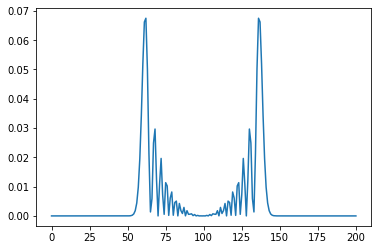

In [98]:
x0 = 1
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented7(x0,n0,t,alpha)
plt.plot(psi_oriented)

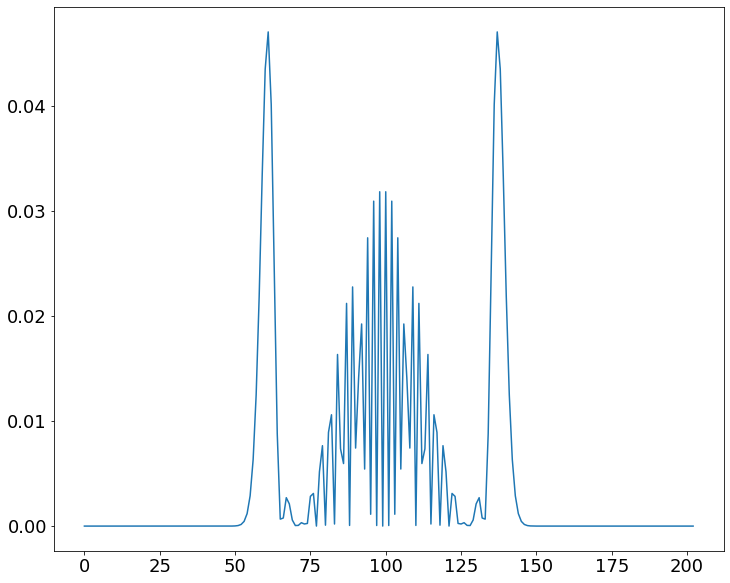

In [65]:
x0 = 2
n0 = 101
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented8(x0,n0,t,alpha)
plt.plot(psi_oriented)

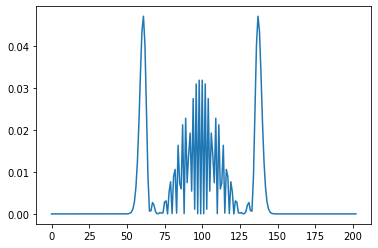

In [5]:
x0 = 2
n0 = 101
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented9(x0,n0,t,alpha)
plt.plot(psi_oriented)

In [7]:
x0 = 3
n0 = 500
t  = 0
alpha=np.pi/2
alphaLen = range(2,4)
alphaList=[0] + [np.pi/(n) for n in alphaLen]
print(list(alphaList))
timeList = np.linspace(1,100,5)
timeListList = [timeList]*len(alphaList)
prob = []
probList = []

for alpha in alphaList:
    for t in timeList:
        psi_oriented = inf_line_bessel_oriented8(x0,n0,t,alpha)
        prob.append(np.sum(psi_oriented[n0-x0-1:n0+x0+2]))
    probList.append(prob)
    prob = []

plt.loglog()
for probability,alpha in zip(probList,[0] + list(alphaLen)):
    if alpha == 0:
        plt.plot(timeList,probability,label=r"$\alpha = 0$")
    else:
        plt.plot(timeList,probability,label=r"$\alpha = \frac{\pi}{%s}$"%str(alpha))

plt.xlim([0,100])
# print(probList)

mpl.rcParams['figure.figsize'] = [12, 10]
plt.legend(loc="lower left", ncol=len(alphaList),fontsize=18)
plt.ylabel(r"$P_{[-%s,%s]}(x)$"%(x0,x0),fontsize=18)
plt.xlabel("t",fontsize=18)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
plt.show()


NameError: name 'np' is not defined

In [4]:
def inf_line_bessel_oriented10(k,nx,t,alpha,theta,gamma,l):
    domain = np.arange(0, nx) - nx//2
    prob = np.zeros([nx + 1,1], dtype='complex')
    for x in range(nx):
            prob[x,0] = ( (np.cos(theta)**2) * (sp.jv(domain[x] + k, 2*t)**2)
                        + (np.sin(theta)**2) * (sp.jv(domain[x] - k, 2*t)**2)
                        + 2*((-1)**k)*np.cos(2*alpha*k + gamma)*np.cos(theta)*np.sin(theta)*sp.jv(domain[x] + k, 2*t)*sp.jv(domain[x] - k, 2*t))

    return prob

def is_unitary(m):
    return np.allclose(np.eye(m.shape[0]), m.H * m)


[(98, 0.7071067811865476), (102, (-0.7071067811865476+8.659560562354934e-17j))]
Qwak Operator is unitary: True


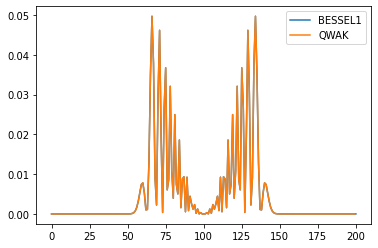

In [185]:
k = 2
n0 = 200
t  = 20
alpha=np.pi/2
if k > 0:
    theta=np.pi/4
else:
    theta = np.pi/2
l = 1
gamma = l * np.pi

psi_oriented = inf_line_bessel_oriented10(k,n0,t,alpha,theta,gamma,l)
plt.plot(psi_oriented,label="BESSEL1")

# psi_oriented2 = inf_line_bessel_oriented8(k,n0,t,alpha)
# plt.plot(psi_oriented2,label="BESSEL2")

n=200
H = nx.path_graph(n,create_using=nx.DiGraph)
G = H.reverse()

for u,v,d in H.edges(data=True):
    d["weight"] = np.exp(1j*alpha)
    mat = np.matrix(d["weight"])

for u,v,d in G.edges(data=True):
    d["weight"] = np.exp(-1j*alpha)
    mat = np.matrix(d["weight"])


graph = nx.compose(H,G)
qw = QWAK(graph)
qw2 = QWAK(graph)

initCond = [(n//2-k,(np.cos(theta))),(n//2+k,(np.exp(1j*gamma)*np.sin(theta)))] # Problema entre esta condicao inicial e a proxima.
# initCond = [(n//2-k,(np.cos(theta))),(n//2+k,2*(np.cos(gamma)*np.sin(theta)))]
# initCond = [(n//2-k,(np.cos(theta))),(n//2+k,np.exp(1j*gamma)*np.sin(theta))]
# initCond = [(n//2-k,1/np.sqrt(2)),(n//2+k,1/np.sqrt(2))]
print(initCond)
qw.runWalk(t,customStateList=initCond)
qw2.runWalk(t,[n//2-k,n//2+k])

qwakProbDist = qw.getProbDistVec()
plt.plot(qwakProbDist,label="QWAK")
plt.legend()

print(f"Qwak Operator is unitary: {is_unitary(qw.getOperator().getOperator())}")
# print(f"Qwak is unitary: {is_unitary(qwakProbDist)}\nBessel is unitary {is_unitary(psi_oriented)}")


In [25]:
def inf_line_bessel_oriented11(k,nx,t,alpha,theta,gamma,l):
    domain = np.arange(0, nx) - nx//2
    prob = np.zeros([nx + 1,1], dtype='complex')

    for x in range(nx):
            prob[x,0] = (np.cos(theta) * sp.jv(domain[x] + k, 2*t) + ((-1)**l)*np.sin(theta) * sp.jv(domain[x] - k, 2*t))**2

    return prob

[(97, 0.7071067811865476), (103, (0.7071067811865476+0j))]
Qwak Operator is unitary: True


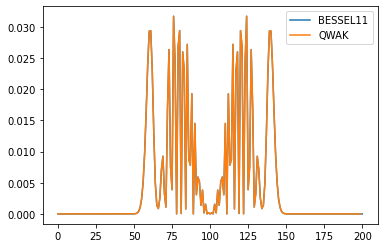

In [166]:
k = 3
n0 = 200
t  = 20
alpha=np.pi/2
if k > 0:
    theta=np.pi/4
else:
    theta = np.pi/2
l = 0
gamma = l * np.pi

psi_oriented = inf_line_bessel_oriented11(k,n0,t,alpha,theta,gamma,l)
plt.plot(psi_oriented,label="BESSEL11")

# psi_oriented2 = inf_line_bessel_oriented10(k,n0,t,alpha,theta,gamma,l)
# plt.plot(psi_oriented2,label="BESSEL10")

n=200
H = nx.path_graph(n,create_using=nx.DiGraph)
G = H.reverse()

for u,v,d in H.edges(data=True):
    d["weight"] = np.exp(1j*alpha)
    mat = np.matrix(d["weight"])

for u,v,d in G.edges(data=True):
    d["weight"] = np.exp(-1j*alpha)
    mat = np.matrix(d["weight"])


graph = nx.compose(H,G)
qw = QWAK(graph)
qw2 = QWAK(graph)

initCond = [(n//2-k,(np.cos(theta))),(n//2+k,(np.exp(1j*gamma)*np.sin(theta)))] # Problema entre esta condicao inicial e a proxima.
# initCond = [(n//2-k,(np.cos(theta))),(n//2+k,2*(np.cos(gamma)*np.sin(theta)))]
# initCond = [(n//2-k,(np.cos(theta))),(n//2+k,np.exp(1j*gamma)*np.sin(theta))]
# initCond = [(n//2-k,1/np.sqrt(2)),(n//2+k,1/np.sqrt(2))]
print(initCond)
qw.runWalk(t,customStateList=initCond)
qw2.runWalk(t,[n//2-k,n//2+k])

qwakProbDist = qw.getProbDistVec()
plt.plot(qwakProbDist,label="QWAK")
plt.legend()

print(f"Qwak Operator is unitary: {is_unitary(qw.getOperator().getOperator())}")
# print(f"Qwak is unitary: {is_unitary(qwakProbDist)}\nBessel is unitary {is_unitary(psi_oriented)}")

In [11]:
k = 1
n0 = 1000
# alpha=np.pi/2
if k > 0:
    theta=np.pi/4
else:
    theta = np.pi/2
l = 0
gamma = l * np.pi

alphaLen = range(2,4)
alphaList=[0] + [np.pi/(n) for n in alphaLen]
print(list(alphaList))
timeList = np.linspace(1,100,500)
timeListList = [timeList]*len(alphaList)
prob = []
probList = []
cubeFuncList = []
invFuncList = []

for alpha in alphaList:
    for t in timeList:
        psi_oriented = inf_line_bessel_oriented10(k,n0,t,alpha,theta,gamma,l)
        prob.append(np.sum(psi_oriented[n0//2-k-1:n0//2+k+2]))
        cubeFuncList.append(1/(t**3))
        invFuncList.append(1/t)
    probList.append(prob)
    prob = []

[0, 1.5707963267948966, 1.0471975511965976]


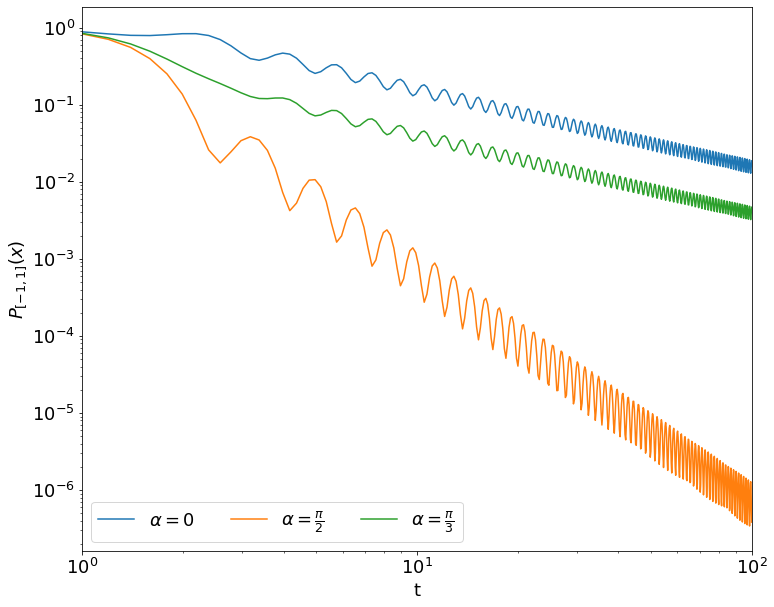

In [10]:
plt.loglog()
for probability,alpha in zip(probList,[0] + list(alphaLen)):
    if alpha == 0:
        plt.plot(timeList,probability,label=r"$\alpha = 0$")
    else:
        plt.plot(timeList,probability,label=r"$\alpha = \frac{\pi}{%s}$"%str(alpha))

# plt.plot(cubeFuncList,label="cube")
# plt.plot(invFuncList,label="inverse")
plt.xlim([1,100])
# print(probList)

mpl.rcParams['figure.figsize'] = [12, 10]
plt.legend(loc="lower left", ncol=len(alphaList),fontsize=18)
plt.ylabel(r"$P_{[-%s,%s]}(x)$"%(k,k),fontsize=18)
plt.xlabel("t",fontsize=18)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
plt.show()

1.5707963267948966
0.0
[(99, 0.7071067811865476), (101, (-0.7071067811865476+2.59786816870648e-16j))]


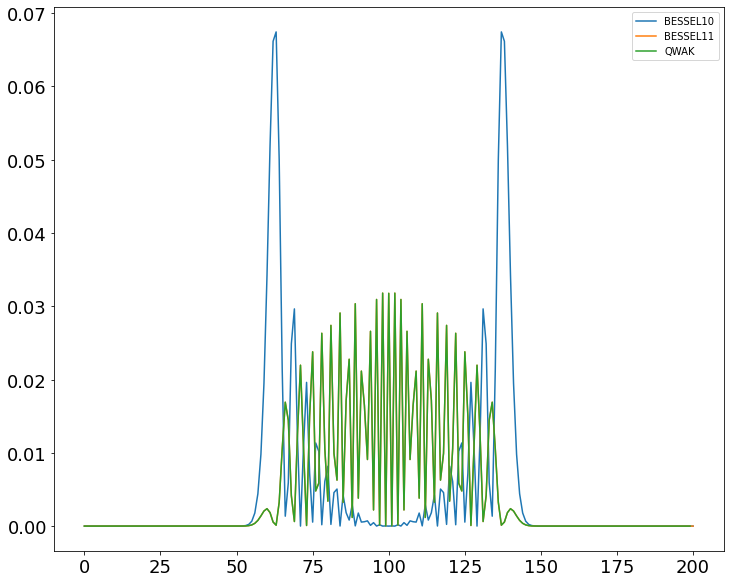

In [84]:
k = 1
n0 = 200
t  = 20
if k > 0:
    theta=np.pi/4
else:
    theta = np.pi/2

l = 3
gamma = l * np.pi
alpha = np.pi/2

v=1
if k%2 == 0:
    alpha2 = (2*v*np.pi - gamma)/(2*k)
else:
    alpha2 = (np.pi + 2*v*np.pi - gamma)/(2*k)


print(alpha)
print(alpha2)
psi_oriented2 = inf_line_bessel_oriented10(k,n0,t,alpha2,theta,gamma,l)
plt.plot(psi_oriented2,label="BESSEL10")
psi_oriented = inf_line_bessel_oriented11(k,n0,t,alpha,theta,gamma,l)
plt.plot(psi_oriented,label="BESSEL11")



n=200
H = nx.path_graph(n,create_using=nx.DiGraph)
G = H.reverse()

for u,v,d in H.edges(data=True):
    d["weight"] = np.exp(1j*alpha)
    mat = np.matrix(d["weight"])

for u,v,d in G.edges(data=True):
    d["weight"] = np.exp(-1j*alpha)
    mat = np.matrix(d["weight"])


graph = nx.compose(H,G)
qw = QWAK(graph)
qw2 = QWAK(graph)

initCond = [(n//2-k,(np.cos(theta))),(n//2+k,(np.exp(1j*gamma)*np.sin(theta)))] # Problema entre esta condicao inicial e a proxima.
print(initCond)
qw.runWalk(t,customStateList=initCond)
qw2.runWalk(t,[n//2-k,n//2+k])

qwakProbDist = qw.getProbDistVec()
plt.plot(qwakProbDist,label="QWAK")
plt.legend()

# print(f"Qwak Operator is unitary: {is_unitary(qw.getOperator().getOperator())}")
# print(f"Qwak is unitary: {is_unitary(qwakProbDist)}\nBessel is unitary {is_unitary(psi_oriented)}")

0.7853981633974483
0.3141592653589793
[(97, 0.7071067811865476), (103, (0.7071067811865476+0j))]


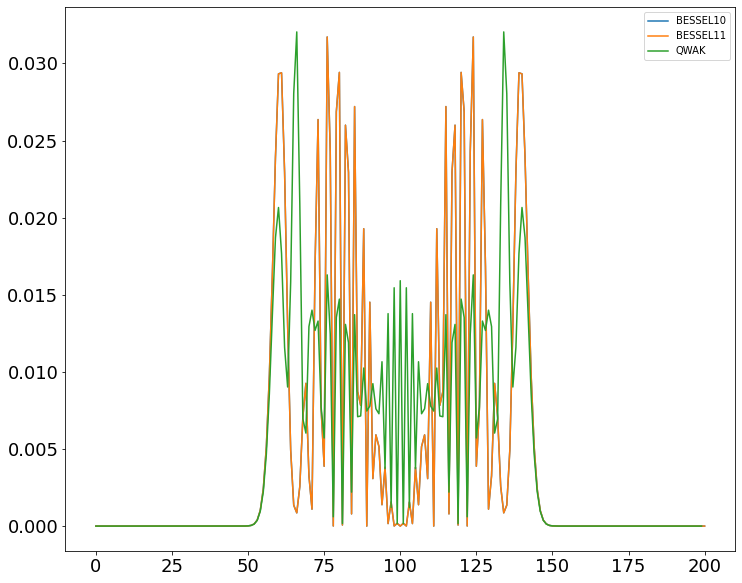

In [66]:
k = 3
n0 = 200
t  = 20
if k > 0:
    theta=np.pi/4
else:
    theta = np.pi/2


l = 0
gamma = l * np.pi
alpha = np.pi/4

v=3
if k%2==0:
    gamma2 = 2*(np.pi*v - alpha*k)
else:
    gamma2 = np.pi + 2*(np.pi*v - alpha*k)

print(alpha)
print(alpha2)
psi_oriented2 = inf_line_bessel_oriented10(k,n0,t,alpha,theta,gamma2,l)
plt.plot(psi_oriented2,label="BESSEL10")
psi_oriented = inf_line_bessel_oriented11(k,n0,t,alpha,theta,gamma,l)
plt.plot(psi_oriented,label="BESSEL11")



n=200
H = nx.path_graph(n,create_using=nx.DiGraph)
G = H.reverse()

for u,v,d in H.edges(data=True):
    d["weight"] = np.exp(1j*alpha)
    mat = np.matrix(d["weight"])

for u,v,d in G.edges(data=True):
    d["weight"] = np.exp(-1j*alpha)
    mat = np.matrix(d["weight"])


graph = nx.compose(H,G)
qw = QWAK(graph)
qw2 = QWAK(graph)

initCond = [(n//2-k,(np.cos(theta))),(n//2+k,(np.exp(1j*gamma)*np.sin(theta)))] # Problema entre esta condicao inicial e a proxima.
print(initCond)
qw.runWalk(t,customStateList=initCond)
qw2.runWalk(t,[n//2-k,n//2+k])

qwakProbDist = qw.getProbDistVec()
plt.plot(qwakProbDist,label="QWAK")
plt.legend()

# print(f"Qwak Operator is unitary: {is_unitary(qw.getOperator().getOperator())}")
# print(f"Qwak is unitary: {is_unitary(qwakProbDist)}\nBessel is unitary {is_unitary(psi_oriented)}")

In [108]:
def inf_line_bessel_oriented12(k,nx,t,alpha,theta,gamma,l):
    domain = np.arange(0, nx) - nx//2
    prob = np.zeros([nx + 1,1], dtype='complex')
    for x in range(nx):
            prob[x,0] = ( (np.cos(theta)**2) * (sp.jv(domain[x] + k, 2*t)**2)
                        + (np.sin(theta)**2) * (sp.jv(domain[x] - k, 2*t)**2)
                        - 2*(np.cos(2*alpha*k + gamma)*np.cos(theta)*np.sin(theta)*sp.jv(domain[x] + k, 2*t)*sp.jv(domain[x] - k, 2*t)))
    return prob

def inf_line_bessel_oriented13(k,nx,t,alpha,theta,gamma,l,v):
    domain = np.arange(0, nx) - nx//2
    prob = np.zeros([nx + 1,1], dtype='complex')
    for x in range(nx):
            prob[x,0] = ( (np.cos(theta)**2) * (sp.jv(domain[x] + k, 2*t)**2)
                        + (np.sin(theta)**2) * (sp.jv(domain[x] - k, 2*t)**2)
                        - 2*(np.cos(2*((np.pi + 2*v*np.pi - gamma)/(2*k))*k + gamma)*np.cos(theta)*np.sin(theta)*sp.jv(domain[x] + k, 2*t)*sp.jv(domain[x] - k, 2*t)))
    return prob

1.5707963267948966
1.0471975511965976
[(97, 0.7071067811865476), (103, (-0.7071067811865476+8.659560562354934e-17j))]


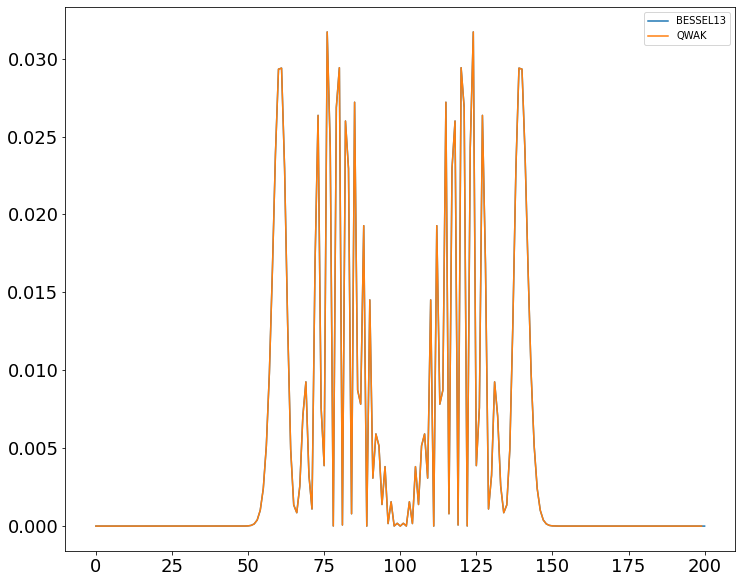

In [126]:
k = 3
n0 = 200
t  = 20
if k > 0:
    theta=np.pi/4
else:
    theta = np.pi/2

l = 1
gamma = l * np.pi
v=1
alpha = np.pi/2
alpha2 = (np.pi + 2*v*np.pi - gamma)/(2*k)

# v=1
# if k%2 == 0:
#     alpha2 = (2*v*np.pi - gamma)/(2*k)
# else:
#     alpha2 = (np.pi + 2*v*np.pi - gamma)/(2*k)


print(alpha)
print(alpha2)
# psi_oriented2 = inf_line_bessel_oriented12(k,n0,t,alpha2,theta,gamma,l)
# plt.plot(psi_oriented2,label="BESSEL12")
psi_oriented2 = inf_line_bessel_oriented13(k,n0,t,alpha2,theta,gamma,l,v)
plt.plot(psi_oriented2,label="BESSEL13")
# psi_oriented = inf_line_bessel_oriented11(k,n0,t,alpha,theta,gamma,l)
# plt.plot(psi_oriented,label="BESSEL11")



n=200
H = nx.path_graph(n,create_using=nx.DiGraph)
G = H.reverse()

for u,v,d in H.edges(data=True):
    d["weight"] = np.exp(1j*alpha2)
    mat = np.matrix(d["weight"])

for u,v,d in G.edges(data=True):
    d["weight"] = np.exp(-1j*alpha2)
    mat = np.matrix(d["weight"])


graph = nx.compose(H,G)
qw = QWAK(graph)
qw2 = QWAK(graph)

initCond = [(n//2-k,(np.cos(theta))),(n//2+k,(np.exp(1j*gamma)*np.sin(theta)))] # Problema entre esta condicao inicial e a proxima.
print(initCond)
qw.runWalk(t,customStateList=initCond)
qw2.runWalk(t,[n//2-k,n//2+k])

qwakProbDist = qw.getProbDistVec()
plt.plot(qwakProbDist,label="QWAK")
plt.legend()

# print(f"Qwak Operator is unitary: {is_unitary(qw.getOperator().getOperator())}")
# print(f"Qwak is unitary: {is_unitary(qwakProbDist)}\nBessel is unitary {is_unitary(psi_oriented)}")